# Fuerzas de ligadura | Péndulo rígido ideal

[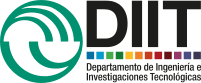](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

# Enunciado 
Calcule la tensión de la cuerda con el método de multiplicadores de Lagrange.
La restricción es que la pesa se mantiene siempre en \\(\vec{r} = \ell \hat{\rho}\\), ergo la función que expresa esto es \\(f(\rho) = \rho - \ell = 0\\).

![](figuras/pénduloHorizontal.png)  

## Variables

In [1]:
import sympy as sym # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as mech # de sympy utilizaremos funciones de mecánica
# import sympy.physics.mechanics as mech
mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Defino los parámetros físicos del sistema
m, g, l = sym.symbols('m, g, \ell', positive=True)

# Defino coordenadas generalizadas 
t = sym.symbols('t') # tiempo
rho = sym.Function('rho')(t)
phi = sym.Function('varphi')(t)

## Posición

In [3]:
# Sistema cartesiano
N = sym.physics.vector.ReferenceFrame('N') # marco referencial N en coordenadas cartesianas

# posición
m_r = rho* (sym.cos(phi)* (-N.y) + sym.sin(phi)* (N.x)) # recordemos que tomamos y hacia arriba

## Ligaduras

In [4]:
f1 = rho - l
lambda1 = sym.symbols('lambda_1') # Tantos lambda como funciones de ligadura

f1_simbolo = sym.Function('f_1')(rho)
f1_eq = sym.Eq(f1_simbolo, f1)
f1_eq

## Energía cinética

In [5]:
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m_v = m_r.diff(t,N) # derivada respecto a t en el marco referencial N
m_T = unMedio* m* m_v.dot(m_v)
T = sym.Eq(sym.Symbol('T'), m_T.simplify() ) # simplify: simplifica usando factor común y otras operaciones
T

## Energía potencial

In [6]:
# Energía potencial
m_V = - (m* g* (- N.y)).dot(m_r)
V = sym.Eq(sym.Symbol('V'), m_V )
V

## Lagrangiano

In [7]:
L = sym.Eq(sym.Symbol('\mathcal{L}'), (T.rhs - V.rhs).simplify())
L

## Ecuaciones de Euler-Lagrange

Las fuerzas generalizadas causadas por un potencial:

$$
\frac{\partial}{\partial q_i} \mathcal{L} .
$$

In [8]:
phi_dq = L.rhs.diff(phi)
rho_dq = L.rhs.diff(rho)

El simíl masa por aceleración, la derivada en el tiempo de los $p_i$:

$$
\frac{\mathrm{d}}{\mathrm{d}t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} .
$$

In [9]:
phi_dtdp = L.rhs.diff(phi.diff(t)).diff(t)
rho_dtdp = L.rhs.diff(rho.diff(t)).diff(t)

Las fuerzas generalizadas de ligadura:

$$
Q_i = \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j .
$$

In [10]:
phi_Q = lambda1* f1.diff(phi)
rho_Q = lambda1* f1.diff(rho)

Con lo anterior pueden escribirse las ecuaciones de Euler-Lagrange:

$$
\frac{\partial}{\partial q_i} \mathcal{L} - \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} - \sum_j \lambda_j(t) \frac{\partial}{\partial q_i} f_j = 0 .
$$

In [11]:
phi_EL = sym.Eq(phi_dq - phi_dtdp - phi_Q, 0) # ecuación igualando a cero
phi_EL.simplify()

In [12]:
rho_EL = sym.Eq(rho_dq - rho_dtdp - rho_Q, 0) # ecuación igualando a cero
rho_EL.simplify()

## Aplicación de la función de ligadura

Debe aplicarse ahora la función de restricción de la ligadura.
No solo hay que substituir en las ecuaciones de Euler-Lagrange el que

In [13]:
rho_f1 = sym.solve(f1, rho)[0]
sym.Eq(rho, rho_f1)

También se puede establere que la derivada primera y segunda con el tiempo de la función de restricción de la ligadura:

In [14]:
sym.Eq(f1.diff(t), 0)

In [15]:
sym.Eq(f1.diff(t,2), 0)

Se substituyen tales valores en la ecuaciones de Euler-Lagrange.

In [23]:
f1_subs = {
    rho : rho_f1,
    rho.diff(t): rho_f1.diff(t),
    rho.diff(t,2): rho_f1.diff(t,2)
}

In [17]:
phi_EL_subs = phi_EL.subs(f1_subs).simplify()
phi_EL_subs

In [18]:
rho_EL_subs = rho_EL.subs(f1_subs).simplify()
rho_EL_subs

De la primera se obtiene la ecuación de la dinámica para $\varphi$:

In [19]:
phi_pp = sym.solve(phi_EL_subs, phi.diff(t,2) )[0]
sym.Eq(phi.diff(t,2), phi_pp)

De la segunda se obtiene una función para $\lambda_1$

In [20]:
lambda1_funcion = sym.solve(rho_EL_subs, lambda1 )[0]
sym.Eq(lambda1, lambda1_funcion)

Como en este caso

$$
Q_\rho= \lambda_1(t) \frac{\partial}{\partial \rho} f_1 = \lambda_1(t),
$$
la expresión para la fuerza de ligadura que realiza la cuerda del péndulo, su tensión, es:

In [21]:
rho_Q_simbolo = sym.Symbol('Q_rho')
sym.Eq(rho_Q_simbolo, lambda1_funcion)